# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [2]:
library(tidyverse)

setwd("/Users/david/Documents/GitHub_Repos/Dickman_DSPN_S22")
data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1 <- data %>% select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)

d1 <- na.omit(d1)

head(d1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

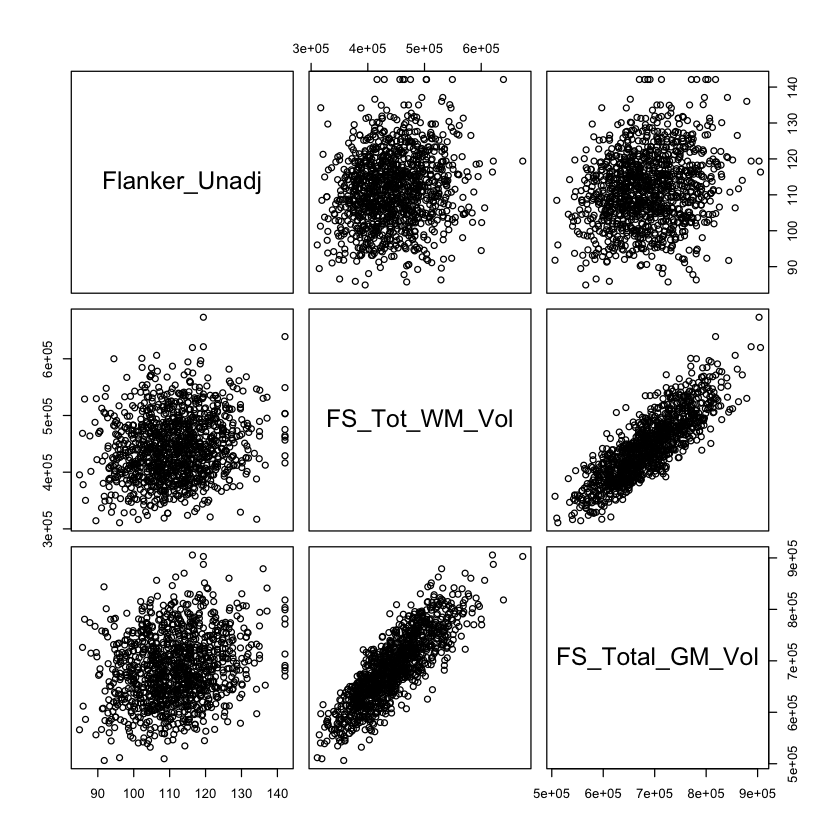

In [3]:
pairs(~ Flanker_Unadj + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1)

> *There are three continuous variables in the data. Of these, white matter (FS_Tot_WM_Vol) and grey matter (FS_Total_GM_Vol) appear strongly positively correlated. Likewise, it appears that grey matter and the Flanker_unadj variable may be slightly positively correlated. Flanker_unadj and white matter seem to be uncorrelated* 
> 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [5]:
regression <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(regression)
confint(regression)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *The results of the above regression show that grey matter volume is significantly associated with flanker task performance (B = 0.00031, 95% CI = 0.00022, 0.000040). The t-statistic informs us that the effect of grey matter volume on the flanker task performance is significantly better than chance, p < .0001. Grey matter volume performance predicts 4% of the variance in flanker task performance. * 
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



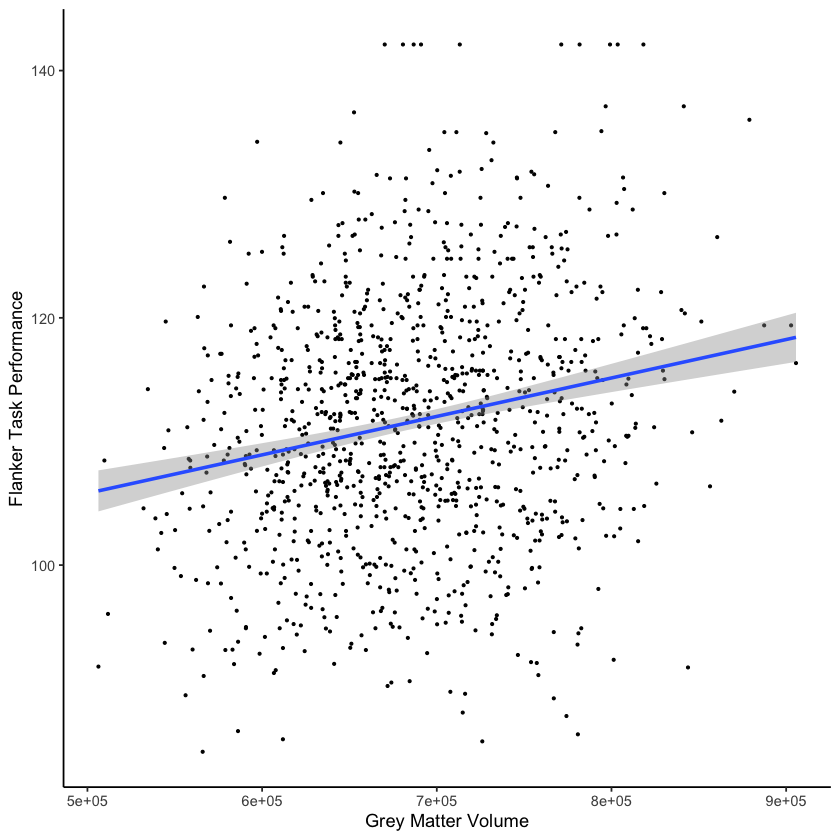

In [9]:
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
        geom_point(size=0.5) +
        geom_smooth(method = lm) +
        theme_classic() +
        scale_x_continuous(name = 'Grey Matter Volume') +
        scale_y_continuous(name = 'Flanker Task Performance')

> *The above graph demonstrates the relationship between grey matter volume and performance on a flanker task. The positive regression slope demonstrates that, as grey matter volume increases, as does performance on the flanker task. We know from question number 3 that this positive relationship is statistically significant. As grey matter volume increases, performance on the flanker task increases.* 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *The above regression results and graph demonstrate that grey matter volume significantly and positively associates with performance on a flanker task. When applied more broadly, these results demonstrate that increased grey matter may relate to improved executive functioning, as demonstrated by the flanker task.* 
> 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Delainey Wescott*